# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: 
- MSSV: 
- Lớp: 

# Import

In [184]:
import pandas as pd
import numpy as np
# Import thêm dữ thư viện nếu cần
import copy
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu

In [185]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)
# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [186]:
# Cài đặt các hàm cần thiết ở đây

def preprocess(x, y):
    X = np.hstack((np.ones((x.shape[0], 1)), x, x**2))
    
    return X, y

class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X) 
        #(AtA)^-1 x At x b
        self.w = X_pinv @ y

        return self


    def get_params(self):
        return self.w


    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)  
    

def mae(y, y_hat):
    # để ravel để y và y_hat về cùng chiều
    return np.mean(np.abs(y.ravel() - y_hat.ravel()))


def calculate_mae(X_train, X_test):
    model = OLSLinearRegression().fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    return mae(y_test, y_pred_test)



# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [187]:
# Phần code cho yêu cầu 1a

# dùng iloc lấy 11 đặc trưng đầu tiên vào X_1a_train
# y_train đã có
X_1a_train = X_train.iloc[:, :11]
X_1a_test = X_test.iloc[:, :11]
# lr1 = OLSLine....fit(X_1a_train, y_train)
lr1 = OLSLinearRegression().fit(X_1a_train, y_train)
# lr.get_parasm()
lr1.get_params().ravel()



array([-22756.51282098,    804.50315567,   1294.65456525, -91781.89753057,
        23182.38867916,   1437.54867231,  -8570.66198486,    147.85829929,
          152.88847648,    117.22184593,  34552.28622083])

In [188]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
y_pred_1a_test = lr1.predict(X_1a_test)
# mae(y_test, y_hat)
mae(y_test, y_pred_1a_test)


104863.77754032997

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -22756.513 \times Gender + 804.503 \times 10percentage + 1294.655 \times 12percentage - 91781.898 \times CollegeTier + 23182.389 \times Degree + 1437.549 \times CollegeGPA  - 8570.662 \times CollegeCityTire + 147.858 \times English + 152.888 \times Logical + 117.223 \times Quant + 34552.286 \times Domain$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [189]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# chỉ xử lý trên tập train
# cài đặt cross-validation (không sử dụng của sklearn)
# phân chia thành 5 tập dữ liệu, mỗi tập tầm 490 mẫu
# shuffle trên 5 tập dữ liệu đó
# sử dụng 2 vòng lặp for
# for(5 tập dữ liệu) { for (5 thuộc tính ["com", "agr", ... "ope"])}
# lần lượt fit trên 5 tập dữ liệu
# tính từng MAE của các thuộc tính, r lấy trung bình

# chuẩn bị các tập dữ liệu cần thiết
def find_best_feature_with_mae(X_train_specific, k):
    mae_res = []
    mae_list = np.zeros(X_train_specific.shape[1])
    y_train_copy = copy.deepcopy(y_train)
    X_train_specific, y_train_copy = shuffle(X_train_specific, y_train_copy, random_state=42)
    for i in range(k):
        start_point = i * len(X_train_specific) // k
        end_point = (i + 1) * len(X_train_specific) // k

        X_train_fold = X_train_specific[start_point:end_point]
        y_train_fold = y_train_copy[start_point:end_point]
        
        X_remain = np.concatenate((X_train_specific[:start_point], X_train_specific[end_point:]), axis=0)
        y_remain = np.concatenate((y_train_copy[:start_point], y_train_copy[end_point:]), axis=0)
        for j in range(X_train_fold.shape[1]):
            lr = OLSLinearRegression()
            lr.fit(X_remain[:, j].reshape(-1, 1), y_remain)
            X_train_fold_np = X_train_fold.to_numpy()
            y_pred_1b_test = lr.predict(X_train_fold_np[:, j].reshape(-1, 1))
            mae_list[j] += mae(y_train_fold, y_pred_1b_test)

    for i in range(len(mae_list)):
        mae_list[i]/=k
        feature_name = X_train_specific.columns[i]
        mae_res.append([feature_name, mae_list[i]])
    return mae_res

k = 5
X_train_copy = copy.deepcopy(X_train)
X_1b_train = X_train_copy.iloc[:, -5:]
mae_res = find_best_feature_with_mae(X_1b_train, k)
mae_df = pd.DataFrame(mae_res, columns=['Feature', 'MAE'])
print(mae_df)


                 Feature            MAE
0      conscientiousness  306311.589183
1          agreeableness  300904.339371
2           extraversion  307023.946425
3            nueroticism  299572.187800
4  openess_to_experience  302950.200467


In [190]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train_best = X_train.loc[:, "nueroticism"].to_numpy()
X_train_best = X_train_best.reshape(-1, 1)
best_personality_feature_model = OLSLinearRegression().fit(X_train_best, y_train)
best_personality_feature_model.get_params()

array([-56546.30375318])

In [191]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
X_test_best = X_test.loc[:, "nueroticism"].to_numpy()
X_test_best = X_test_best.reshape(-1, 1)
y_pred_test_best = best_personality_feature_model.predict(X_test_best)
print(mae(y_test, y_pred_test_best))


291019.693226953


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -56546.304 \times Nueroticism$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [192]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu
k = 5
X_1c_train = X_train_copy.loc[:, ["English", "Logical", "Quant"]]
mae_res = find_best_feature_with_mae(X_1c_train, k)
mae_df = pd.DataFrame(mae_res, columns=['Feature', 'MAE'])
print(mae_df)



   Feature            MAE
0  English  121921.863413
1  Logical  120270.240819
2    Quant  118122.118030


In [193]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_1c_train_best = X_train.loc[:, "Quant"].to_numpy()
X_1c_train_best = X_1c_train_best.reshape(-1, 1)
best_skill_feature_model = OLSLinearRegression().fit(X_1c_train_best, y_train)
best_skill_feature_model.get_params()

array([585.89538084])

In [194]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
X_1c_test_best = X_test.loc[:, "Quant"].to_numpy()
X_1c_test_best = X_1c_test_best.reshape(-1, 1)
y_pred_1c_test_best = best_skill_feature_model.predict(X_1c_test_best)
# print(X_1c_test_best)
print(mae(y_test, y_pred_1c_test_best))

106819.57761989674


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 585.895 \times Quant$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

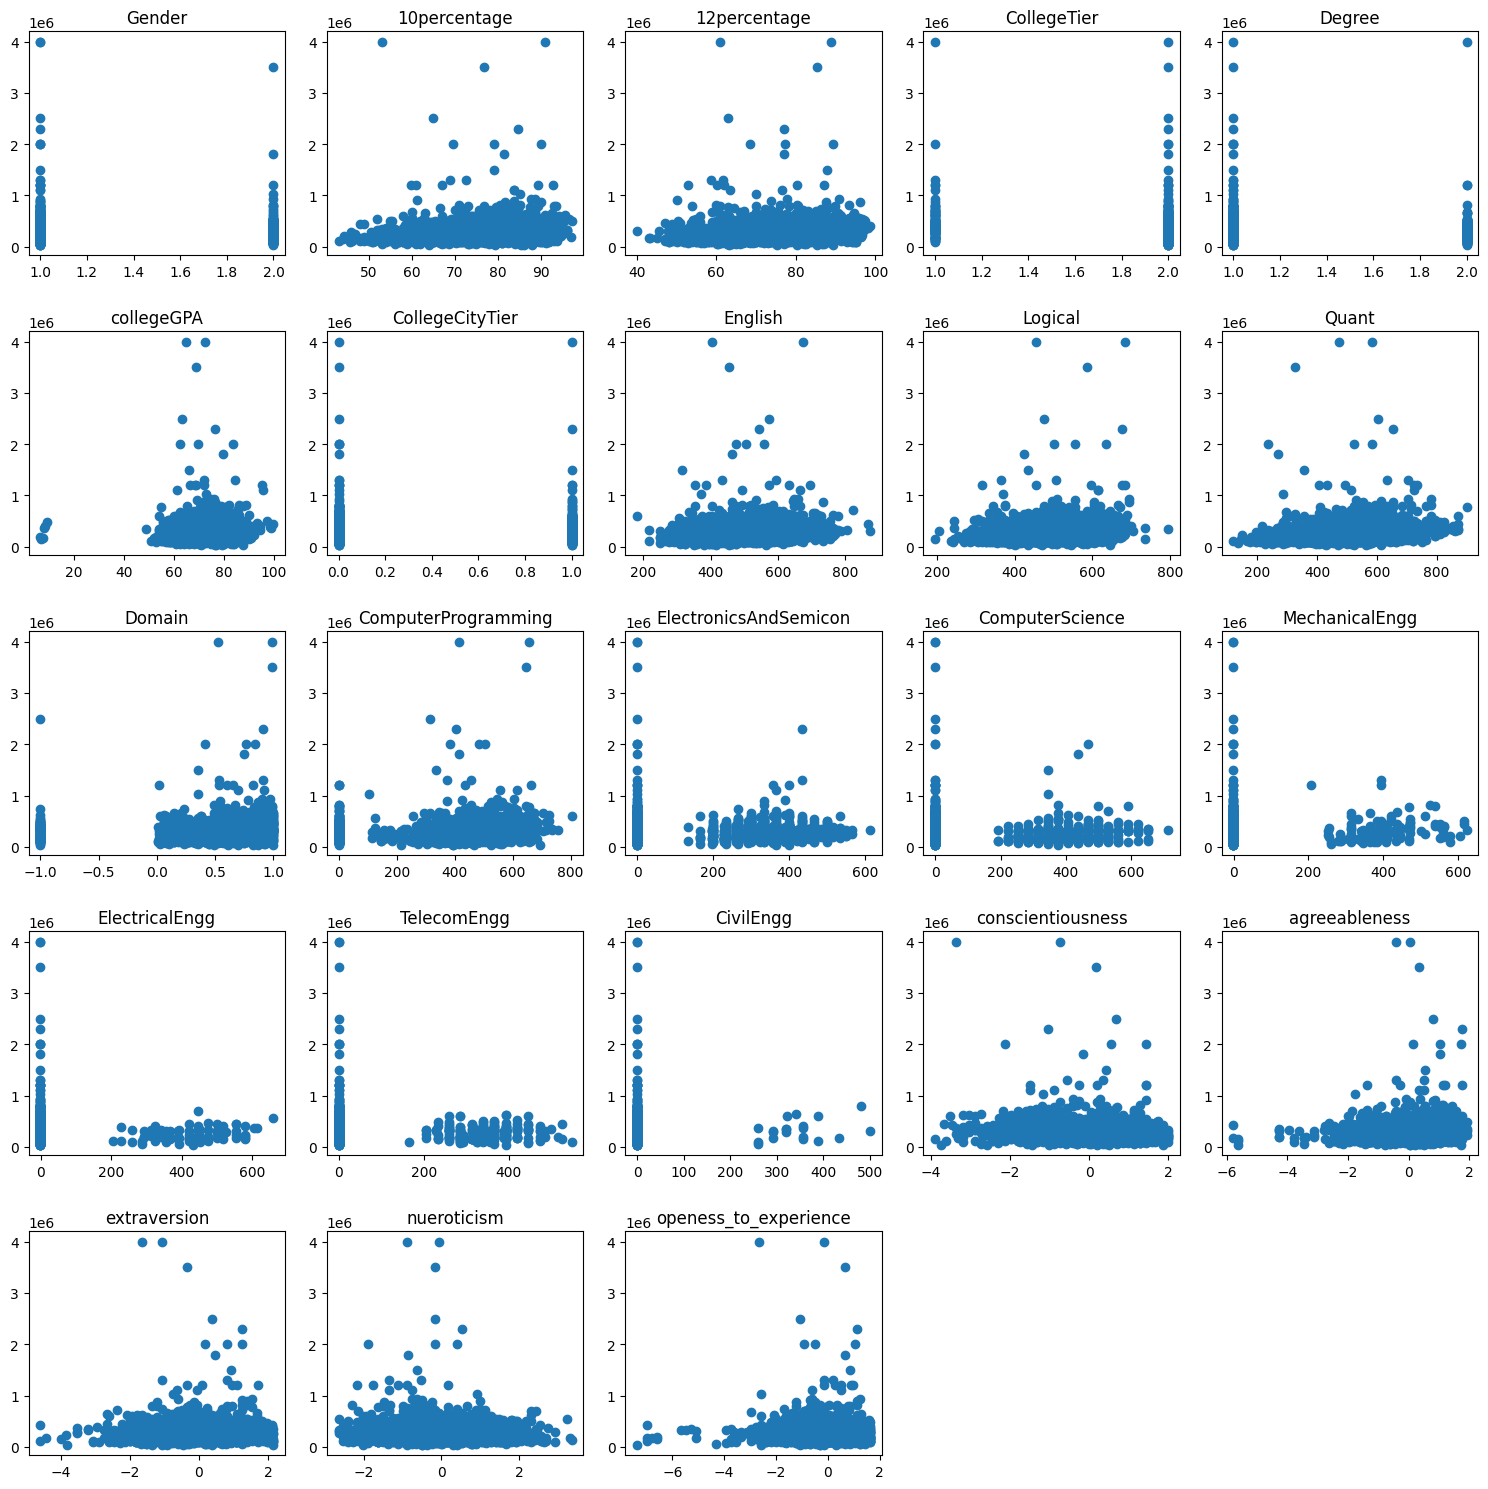

<Axes: >

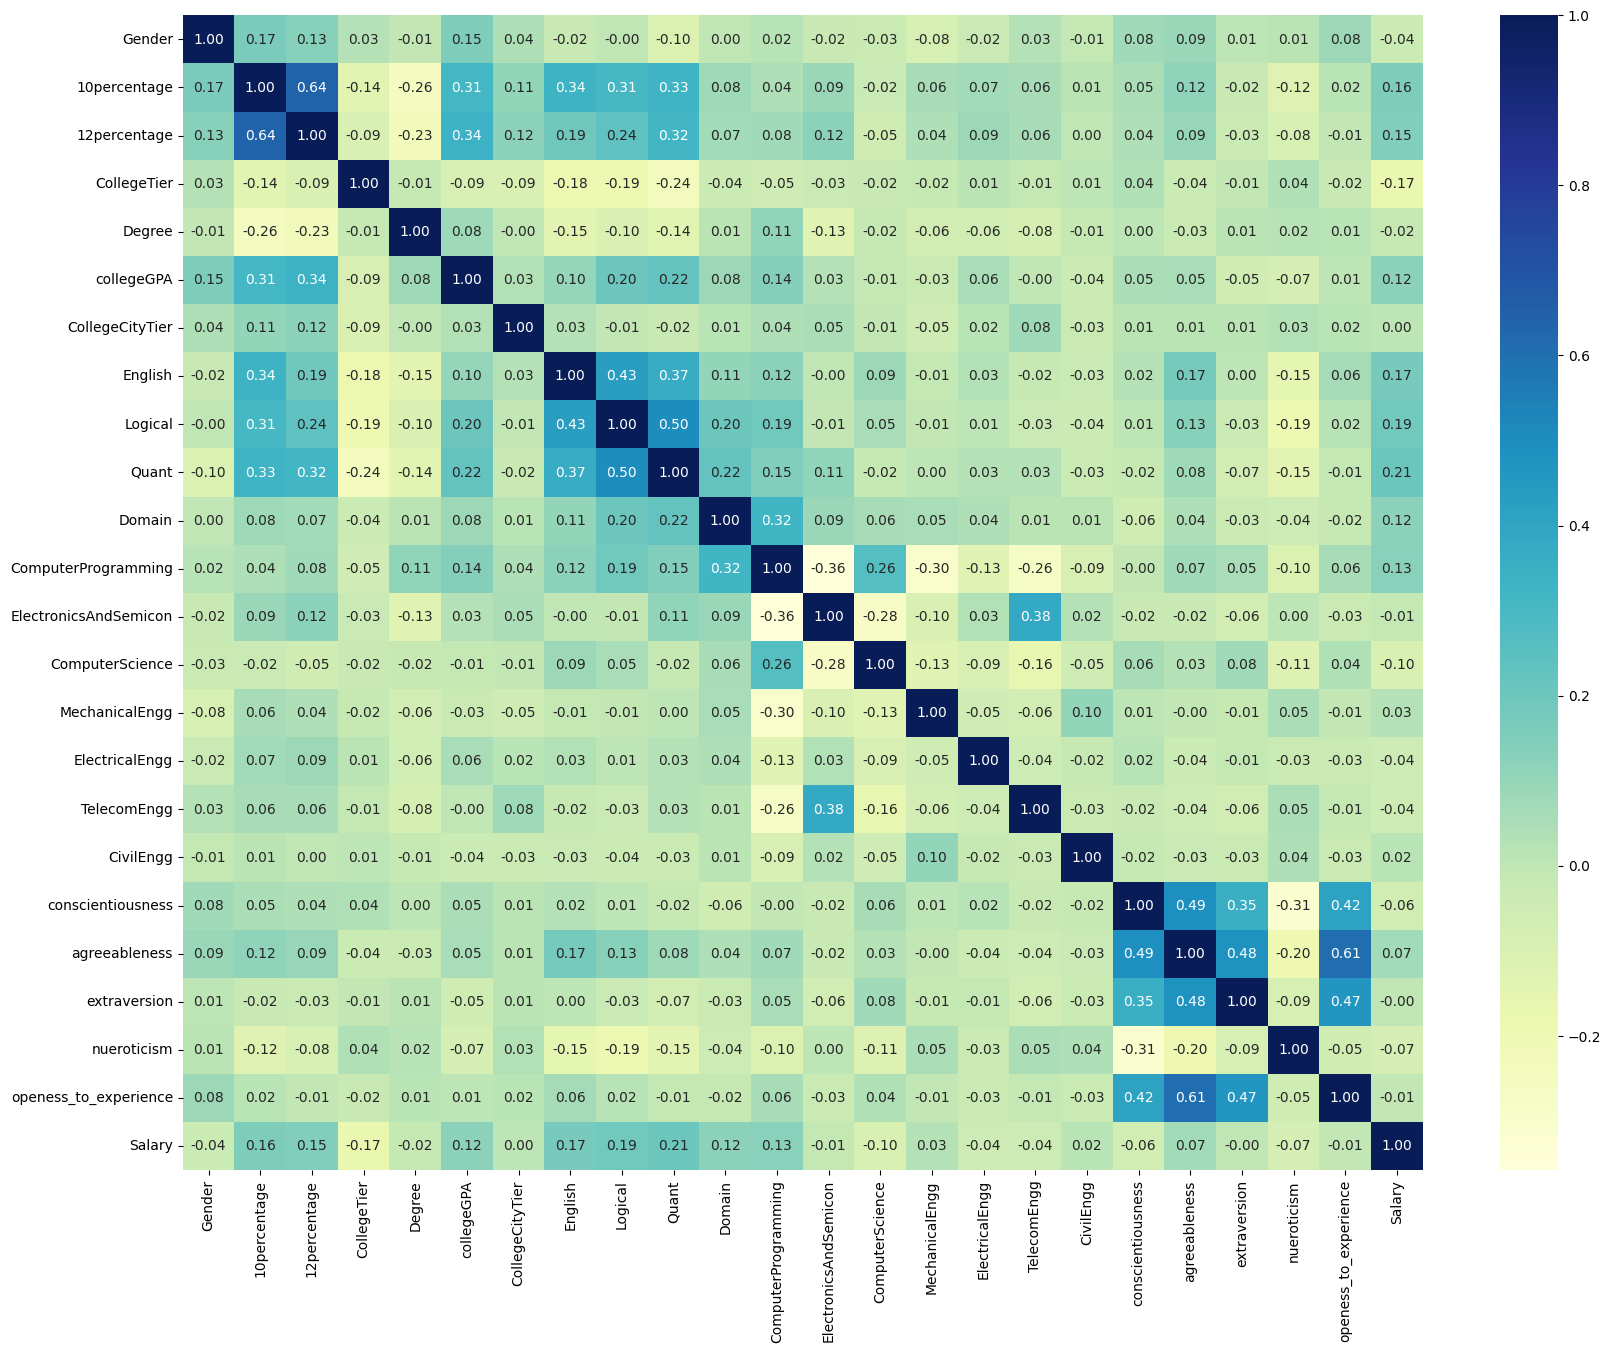

In [195]:
# Trình bày các phần tìm ra mô hình

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
num_rows = int(np.ceil(X_train_np.shape[1] / 5))
plt.figure(figsize=(15, num_rows * 3))
for i in range(X_train_np.shape[1]):
    plt.subplot(num_rows, 5, i + 1)
    plt.scatter(X_train_np[:, i].reshape(-1, 1), y_train_np, marker='o')
    plt.title(X_train.columns[i])
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap="YlGnBu") # or cmap="coolwarm"

## Thử nghiệm, so sánh các mô hình

In [196]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

# lr = OLSLinearRegression()
#             lr.fit(X_remain[:, j].reshape(-1, 1), y_remain)
#             X_train_fold_np = X_train_fold.to_numpy()
#             X_pred_1b_test = lr.predict(X_train_fold_np[:, j].reshape(-1, 1))
#             mae_list[j] += mae(y_train_fold, X_pred_1b_test)

k = 5
num_of_models = 4
mae_res = []
X_train_copy = copy.deepcopy(X_train)
y_train_copy = copy.deepcopy(y_train)
mae_list = np.zeros(num_of_models)
X_train_copy, y_train_copy = shuffle(X_train_copy, y_train_copy, random_state=42)
for i in range(k):
    start_point = i * len(X_train_copy) // k
    end_point = (i + 1) * len(X_train_copy) // k

    X_train_fold = X_train_copy[start_point:end_point]
    y_train_fold = y_train_copy[start_point:end_point]

    X_remain = np.concatenate((X_train_copy[:start_point], X_train_copy[end_point:]), axis=0)
    X_remain = pd.DataFrame(X_remain, columns=X_train_copy.columns)
    y_remain = np.concatenate((y_train_copy[:start_point], y_train_copy[end_point:]), axis=0)

    # MÔ HÌNH THỨ NHẤT-----------------------------------------------------------------------------
    selected_features = ["10percentage", "ComputerScience", "collegeGPA", "ComputerProgramming", "Domain", "CollegeTier"]
    X_train_model_1 = X_remain[selected_features].to_numpy()
    X_test_model_1 = X_train_fold[selected_features]

    lr1 = OLSLinearRegression().fit(X_train_model_1, y_remain)
    y_pred_test_model_1 = lr1.predict(X_test_model_1)
    mae_list[0] += mae(y_train_fold, y_pred_test_model_1)

    # MÔ HÌNH THỨ HAI-----------------------------------------------------------------------------
    selected_features = ["ElectronicsAndSemicon", "10percentage", "agreeableness", "Logical"]
    X_train_model_2 = copy.deepcopy(X_remain)
    X_train_model_2["ElectronicsAndSemicon"] = X_train_model_2["ElectronicsAndSemicon"] + X_train_model_2["TelecomEngg"]
    X_train_model_2["10percentage"] = np.square(X_train_model_2["10percentage"]) + np.square(X_train_model_2["12percentage"])
    X_train_model_2["agreeableness"] = np.square(X_train_model_2["agreeableness"]) + np.square(X_train_model_2["openess_to_experience"])
    X_train_model_2["Logical"] = np.square(X_train_model_2["Logical"]) + np.square(X_train_model_2["Quant"])
    X_train_model_2 = X_train_model_2[selected_features].to_numpy()

    X_test_model_2 = copy.deepcopy(X_train_fold)
    X_test_model_2["ElectronicsAndSemicon"] = X_test_model_2["ElectronicsAndSemicon"] + X_test_model_2["TelecomEngg"]
    X_test_model_2["10percentage"] = np.square(X_test_model_2["10percentage"]) + np.square(X_test_model_2["12percentage"])
    X_test_model_2["agreeableness"] = np.square(X_test_model_2["agreeableness"]) + np.square(X_test_model_2["openess_to_experience"])
    X_test_model_2["Logical"] = np.square(X_test_model_2["Logical"]) + np.square(X_test_model_2["Quant"])
    X_test_model_2 = X_test_model_2[selected_features]

    lr2 = OLSLinearRegression().fit(X_train_model_2, y_remain)
    y_pred_test_model_2 = lr2.predict(X_test_model_2)
    mae_list[1] += mae(y_train_fold , y_pred_test_model_2)

    # MÔ HÌNH THỨ BA-----------------------------------------------------------------------------
    selected_features = ["10percentage", "agreeableness", "Logical", "Domain"]
    X_train_model_3 = copy.deepcopy(X_remain)
    X_train_model_3["10percentage"] = np.square(X_train_model_3["10percentage"]) + np.square(X_train_model_3["12percentage"])
    X_train_model_3["agreeableness"] = np.square(X_train_model_3["agreeableness"]) + np.square(X_train_model_3["openess_to_experience"]) + np.square(X_train_model_3["conscientiousness"])
    X_train_model_3["Logical"] = np.square(X_train_model_3["Logical"]) + np.square(X_train_model_3["Quant"])
    X_train_model_3["Domain"] = np.square(X_train_model_3["Domain"]) + np.square(X_train_model_3["ComputerProgramming"])
    X_train_model_3 = X_train_model_3[selected_features].to_numpy()

    X_test_model_3 = copy.deepcopy(X_train_fold)
    X_test_model_3["10percentage"] = np.square(X_test_model_3["10percentage"]) + np.square(X_test_model_3["12percentage"])
    X_test_model_3["agreeableness"] = np.square(X_test_model_3["agreeableness"]) + np.square(X_test_model_3["openess_to_experience"]) + np.square(X_test_model_3["conscientiousness"])
    X_test_model_3["Logical"] = np.square(X_test_model_3["Logical"]) + np.square(X_test_model_3["Quant"])
    X_test_model_3["Domain"] = np.square(X_test_model_3["Domain"]) + np.square(X_test_model_3["ComputerProgramming"])
    X_test_model_3 = X_test_model_3[selected_features]

    lr3 = OLSLinearRegression().fit(X_train_model_3, y_remain)
    y_pred_test_model_3 = lr3.predict(X_test_model_3)
    mae_list[2] += mae(y_train_fold , y_pred_test_model_3)

    # MÔ HÌNH THỨ TƯ-----------------------------------------------------------------------------
    selected_features = ["10percentage", "ComputerScience", 
                         "ComputerProgramming",  "Domain", 
                         "CollegeTier", "Quant", "CivilEngg", 
                         "ElectronicsAndSemicon", "ElectricalEngg"]
    X_train_model_4 = copy.deepcopy(X_remain)
    X_train_model_4["10percentage"] = np.square(X_train_model_4["10percentage"]) + np.square(X_train_model_4["12percentage"])
    X_train_model_4 = X_train_model_4[selected_features].to_numpy()

    X_test_model_4 = copy.deepcopy(X_train_fold)
    X_test_model_4["10percentage"] = np.square(X_test_model_4["10percentage"]) + np.square(X_test_model_4["12percentage"])
    X_test_model_4 = X_test_model_4[selected_features]


    lr4 = OLSLinearRegression().fit(X_train_model_4, y_remain)
    y_pred_test_model_4 = lr4.predict(X_test_model_4)
    mae_list[3] += mae(y_train_fold , y_pred_test_model_4)

for i in range(num_of_models):
    print(mae_list[i]/5)

113637.17223755378
114276.88254035746
113188.80348391319
111251.91114222576


In [197]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
X_train_1d = copy.deepcopy(X_train)
X_test_1d = copy.deepcopy(X_test)

selected_features = ["10percentage", "ComputerScience", 
                    "ComputerProgramming", "Domain", "CollegeTier", "Quant", 
                    "CivilEngg", "ElectronicsAndSemicon", "ElectricalEngg"]

X_train_1d["10percentage"] = np.square(X_train_1d["10percentage"]) + np.square(X_train_1d["12percentage"])
X_test_1d["10percentage"] = np.square(X_test_1d["10percentage"]) + np.square(X_test_1d["12percentage"])

X_train_best_model = X_train_1d.loc[:, selected_features].to_numpy()
my_best_model = OLSLinearRegression().fit(X_train_best_model ,y_train)
params_list = my_best_model.get_params()

for i in range(len(params_list)):
    print(round(params_list[i], 3))


11.543
-157.88
113.127
30257.298
-14290.502
317.536
159.457
-60.483
-143.549


In [198]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
X_test_best_model = X_test_1d.loc[:, selected_features].to_numpy()
y_pred_best_model_test = my_best_model.predict(X_test_best_model)
print(mae(y_test , y_pred_best_model_test))


99456.86846885482


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 11.543 \times (10percentage^2 + 12percentage^2) - 157.880 \times ComputerScience + 113.127 \times ComputerProgramming + 30257.298 \times Domain - 14290.502 \times CollegeTier + 317.536 \times Quant + 159.457 \times CivilEngg - 60.483 \times ElectronicsAndSemicon - 143.549 \times ElectricalEngg$$

In [199]:
def plot_one_feature(X_train, feature):
    plt.scatter(X_train_1d[feature], y_train_np.reshape(-1, 1), marker='o')
    plt.title(feature)
    plt.show()

X_train_1d = copy.deepcopy(X_train)
X_test_1d = copy.deepcopy(X_test)


# processing on X_train
X_train_1d["10percentage"] = np.square(X_train_1d["10percentage"]) + np.square(X_train_1d["12percentage"])
X_train_1d["agreeableness"] = np.square(X_train_1d["agreeableness"]) + np.square(X_train_1d["openess_to_experience"]) + np.square(X_train_1d["conscientiousness"])
X_train_1d["Logical"] = np.square(X_train_1d["Logical"]) + np.square(X_train_1d["Quant"])
X_train_1d["Domain"] = np.square(X_train_1d["Domain"]) + np.square(X_train_1d["ComputerProgramming"])

# processing on X_test
X_test_1d["10percentage"] = np.square(X_test_1d["10percentage"]) + np.square(X_test_1d["12percentage"])
X_test_1d["agreeableness"] = np.square(X_test_1d["agreeableness"]) + np.square(X_test_1d["openess_to_experience"]) + np.square(X_test_1d["conscientiousness"])
X_test_1d["Logical"] = np.square(X_test_1d["Logical"]) + np.square(X_test_1d["Quant"])
X_test_1d["Domain"] = np.square(X_test_1d["Domain"]) + np.square(X_test_1d["ComputerProgramming"])


# plot_one_feature(X_train_1d, "Quant")

X_train_model_2 = X_train_1d.loc[:, ["10percentage","agreeableness", "Logical", "Domain"]]
X_train_model_2 = X_train_model_2.to_numpy()
X_test_model_2 = X_test_1d.loc[:, ["10percentage", "agreeableness", "Logical", "Domain"]]
X_test_model_2 = X_test_model_2.to_numpy()
print(calculate_mae(X_train_model_2, X_test_model_2))

102655.17476271212


In [200]:
X_train_1d = copy.deepcopy(X_train)
X_test_1d = copy.deepcopy(X_test)


# plot_one_feature(X_train_1d, "MechanicalEngg")
# processing on X_train
X_train_1d["ElectronicsAndSemicon"] = X_train_1d["ElectronicsAndSemicon"] + X_train_1d["TelecomEngg"]
X_train_1d["10percentage"] = np.square(X_train_1d["10percentage"]) + np.square(X_train_1d["12percentage"])
X_train_1d["agreeableness"] = np.square(X_train_1d["agreeableness"]) + np.square(X_train_1d["openess_to_experience"])
X_train_1d["Logical"] = np.square(X_train_1d["Logical"]) + np.square(X_train_1d["Quant"])
# processing on X_test
X_test_1d["ElectronicsAndSemicon"] = X_test_1d["ElectronicsAndSemicon"] + X_train_1d["TelecomEngg"]
X_test_1d["10percentage"] = np.square(X_test_1d["10percentage"]) + np.square(X_test_1d["12percentage"])
X_test_1d["agreeableness"] = np.square(X_test_1d["agreeableness"]) + np.square(X_test_1d["openess_to_experience"])
X_test_1d["Logical"] = np.square(X_test_1d["Logical"]) + np.square(X_test_1d["Quant"])

# plot_one_feature(X_train_1d, "MechanicalEngg")
X_train_model_3 = X_train_1d.loc[:, ["ElectronicsAndSemicon", "10percentage", "agreeableness", "Logical"]]
X_train_model_3 = X_train_model_3.to_numpy()
X_test_model_3 = X_test_1d.loc[:, ["ElectronicsAndSemicon", "10percentage", "agreeableness", "Logical"]]
X_test_model_3 = X_test_model_3.to_numpy()
print(calculate_mae(X_train_model_3, X_test_model_3))

104363.02840715021


In [201]:
X_train_1d = copy.deepcopy(X_train)
X_test_1d = copy.deepcopy(X_test)

X_train_1d["10percentage"] = np.square(X_train_1d["10percentage"]) + np.square(X_train_1d["12percentage"])
X_test_1d["10percentage"] = np.square(X_test_1d["10percentage"]) + np.square(X_test_1d["12percentage"])

X_train_model_4 = X_train_1d.loc[:, ["10percentage", "ComputerScience", "ComputerProgramming", 
                                     "Domain", "CollegeTier", "Quant", 
                                     "CivilEngg", "ElectronicsAndSemicon", "ElectricalEngg"]]
X_train_model_4 = X_train_model_4.to_numpy()
X_test_model_4 = X_test_1d.loc[:, ["10percentage", "ComputerScience", "ComputerProgramming", 
                                   "Domain", "CollegeTier", "Quant",
                                   "CivilEngg", "ElectronicsAndSemicon", "ElectricalEngg"]]
X_test_model_4 = X_test_model_4.to_numpy()
print(calculate_mae(X_train_model_4, X_test_model_4))

99456.86846885482


In [202]:
X_train_1d = copy.deepcopy(X_train)
X_test_1d = copy.deepcopy(X_test)

X_train_model_4 = X_train_1d.loc[:, ["10percentage", "ComputerScience", "collegeGPA", "ComputerProgramming", "Domain", "CollegeTier"]]
X_train_model_4 = X_train_model_4.to_numpy()
X_test_model_4 = X_test_1d.loc[:, ["10percentage", "ComputerScience", "collegeGPA", "ComputerProgramming", "Domain", "CollegeTier"]]
X_test_model_4 = X_test_model_4.to_numpy()

print(calculate_mae(X_train_model_4, X_test_model_4))

104270.83429654039
